# Visualisation of MouseReMoCo data 

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fnameDataCSV = "../data.csv"
fnameMarkerCSV = "../marker.csv"
fnameXDF = "/Users/denismottet/Documents/CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-Default_run-001_eeg.xdf"

## Read the data from the CSV file

In [9]:
# read the data from the csv file
data = np.genfromtxt(fnameDataCSV, delimiter=',', skip_header=4)

# find rows full of zeros )
rows = np.where(~data.any(axis=1))[0]
# replace rows full of zeros with NaN
data[rows,:] = np.nan

t = data[:,0]
x = data[:,1]
y = data[:,2]
isInside = data[:,3]

print(data.shape)

(1374, 4)


## Read the markers from the CSV file

In [10]:

marker = np.genfromtxt(fnameMarkerCSV, delimiter=',', skip_header=4, dtype=str, invalid_raise  = False)

print(marker.shape)
    
def find_substring(label, strings):
    """Find all indices of strings that contain a given substring."""
    iFound = np.array([], dtype=int)
    for i in range(0, strings.size):
        if label in strings[i]:
            iFound = np.append(iFound, i)
    return iFound

def time_of_label_in_markers(label, markers):
    """Find the time of markers that contain a given label."""
    strings = markers[:,2]
    time = marker[:,1].astype(float)
    iFound = find_substring(label, strings)
    time = time[iFound]
    return time

# find time of marker that contains "DoPause" and "DoRecord"
timeDoPause = time_of_label_in_markers("DoPause", marker)
timeDoRecord = time_of_label_in_markers("DoRecord", marker)


(10, 3)


/var/folders/c6/hf96t_d56jggycpvmb1mz3tr0000gn/T/ipykernel_82189/2088122553.py:1: ConversionWarning: Some errors were detected !
    Line #15 (got 10 columns instead of 3)
    Line #16 (got 10 columns instead of 3)
    Line #17 (got 10 columns instead of 3)
    Line #18 (got 10 columns instead of 3)
    Line #19 (got 10 columns instead of 3)
    Line #20 (got 10 columns instead of 3)
    Line #21 (got 10 columns instead of 3)
    Line #22 (got 10 columns instead of 3)
    Line #23 (got 10 columns instead of 3)
  marker = np.genfromtxt(fnameMarkerCSV, delimiter=',', skip_header=4, dtype=str, invalid_raise  = False)


# Read the data from the XDF file 

In [11]:
import pyxdf

fnameXDF = "/Users/denismottet/Documents/CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-Default_run-001_eeg_old8.xdf"
fnameXDF = "/Users/denismottet/Documents/CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-Default_run-001_eeg_old5.xdf"
fnameXDF = "/Users/denismottet/Documents/CurrentStudy/sub-P001/ses-S001/eeg/sub-P001_ses-S001_task-Default_run-001_eeg.xdf"


data, header = pyxdf.load_xdf(fnameXDF)

for stream in data:
    ts = stream['time_series']
    print(stream['info']['name'][0] + ", " +stream['info']['type'][0])
    if isinstance(ts, list):
        print("\t " + str(len(ts)) + " items")
    elif isinstance(ts, np.ndarray):
        print("\t " + str(ts.shape) + " samples")
    
    #print(stream['info'])
    
   
# for stream in data:
#     yy = stream['time_series']

#     if isinstance(yy, list):
#         # list of strings, draw one vertical line for each marker
#         for timestamp, marker in zip(stream['time_stamps'], yy):
#             plt.axvline(x=timestamp)
#             print(f'Marker "{marker[0]}" @ {timestamp:.2f}s')
#     elif isinstance(yy, np.ndarray):
#         # numeric data, draw as lines
#         print(f'Found {stream["info"]["name"][0]} stream with {yy.shape[1]} samples')
#         plt.plot(stream['time_stamps'], yy)
#     else:
#         raise RuntimeError('Unknown stream format')

# plt.show()


MouseMarkers, Markers
	 11 items
MouseToNIC, Markers
	 (5, 1) samples
MouseData, MoCap
	 (1375, 3) samples


## Plot the data and the markers 

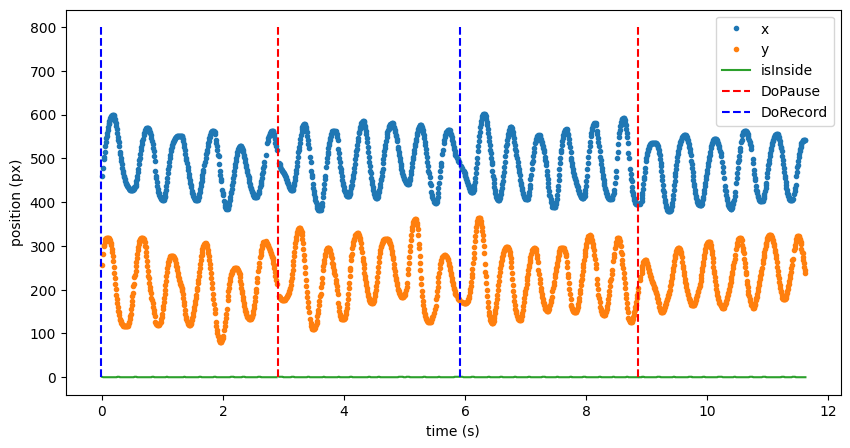

In [12]:
# time in seconds for the plot
t0 = t[0]
def timeInSec(time):
    return (time - t0) / 1000   

t_s = timeInSec(t)
timeDoPause_s = timeInSec(timeDoPause)
timeDoRecord_s = timeInSec(timeDoRecord)

# plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(t_s, x, ".", label='x')
ax.plot(t_s, y, ".", label='y')
ax.plot(t_s, isInside, label='isInside')
ax.set_xlabel('time (s)')
ax.set_ylabel('position (px)')

def plotMarker(ax, time2plot, label, color='red'):
    """Plot a marker at the given time """
    x2plot = np.array([])
    y2plot = np.array([])
    for i in range(len(time2plot)):
        x2plot = np.append(x2plot, [time2plot[i] , time2plot[i], np.nan] )
        y2plot = np.append(y2plot, [0, 800, np.nan])
        
    ax.plot(x2plot, y2plot, label=label, marker='none', color=color, linestyle='--')

plotMarker(ax, timeDoPause_s, 'DoPause', color='red')
plotMarker(ax, timeDoRecord_s, 'DoRecord', color='blue')

ax.legend()

plt.show()

